# Supervised Learning

## BCCC-DoHBrw-2020

### Introduction


#### Problem 

The goal of this project is to predict whether a DoH (DNS over HTTPS) network flow is benign or malicious, based on the provided attributes. This constitutes a binary classification problem, where the target variable is the label indicating whether a traffic is benign or malicious.

#### Dataset

The dataset utilized in this project originates from [Kaggle's BCCC-CIRA-CIC-DoHBrw-2020 -- DOH Dataset ](https://www.kaggle.com/datasets/supplejade/bccc-cira-cic-dohbrw-2020-dns-over-http?resource=download) was created at the University of New Brunswick in Fredericton. This dataset can be considered as balanced version of original dataset CIRA-CIC-DoBre-2020 'which is skewed with about 90% malicious and 10% benign Domain over HTTPS (DoH) network traffic. This balance was achieved using the Synthetic Minority Over-sampling Technique (SMOTE).

It has about 500k instances, each characterized by 29 attributes. Among these attributes is the target Label, which can be Benign or Malicious. The other 28 attributes are numeric values, and some of those are:

-   FlowBytesSent: The amount of bytes sent in the network flow.
-   FlowBytesSentRate: The rate of those bytes that are being sent.
-   FlowBytesReceived: The amount of bytes received in the network flow.
-   FlowBytesReceivedRate: The rate of those bytes that are being received.
-   PacketLengthMean: The mean of the length of all the packets that are being exchanged in the network flow.
-   PacketLengthMedian: The median of those packets.
-   PacketTimeMean: The mean of the time that those packets take to be sent and arrive to the receiver.
-   PacketTimeMedian: The median of the time of those packets.

Most of the attributes are about the same thing but represent different calculations like the mean, median, mode, standard deviation, etc.

#### Solution

To address this problem, a supervised learning approach will be employed using the following steps

1. Data Preprocessing: To prepare the data, the dataset will be loaded and then preprocessed to assure data quality. To achieve that, we handle possible missing values, duplicate data, filter outliers and aggregate some attributes based on their correlation.

2. Definition of the training and test sets: The dataset will be split into training and test sets to train the model and evaluate its performance.

3. Selection and parameterization of the learning algorithms: Different supervised learning algorithms will be selected and parameterized to train the model. Those algorithms are Decision Trees, Neural Networks, K-Nearest Neighbor and Support Vector Machines. 

4. Evaluation of the learning process: The performance of the trained models will be evaluated by observing the confusion matrices and different metrics such as accuracy, precision, recall, F1 measure and some cross-validation scores.


+- ***

| Name | UP_Number |
|-|-|
| Guilherme Coutinho | up202108872 |
| Xavier Outeiro | up202108895 |
| Miguel Figueiredo | up201706105 |
| Group | T04-G46 |


#### Imports

In order to run this notebook, the following libraries are required:

In [1]:
import warnings 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.cluster import hierarchy

warnings.filterwarnings('ignore')

## 1. Data Pre-processing

First we created a Data Frame from the dataset that was given to us.
We can see that the dataset has 29 columns, 28 attributes and 1 label, and 499106 rows.

In [3]:
df=pd.read_csv("../data/cyber_data.csv")
df.shape

(499106, 29)

Here are the first 5 rows of the dataset:

In [4]:
df.head()

,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,353,80.890348,393,90.056393,469.209877,21.661253,82.888889,66.0,66,2.339046,...,0.534524,1.754601e-09,0.000042,0.000048,0.000019,0.000017,2.028699,0.737490,0.869641,Benign
1,1807,53.056709,4828,141.758602,145520.370987,381.471324,228.793103,76.0,68,1.201609,...,1.591559,5.348911e-05,0.007314,0.011523,0.015273,0.000016,-1.538407,1.573304,0.634722,Malicious
2,15000,479.536009,27719,886.150575,25949.480963,161.088426,135.186709,87.0,87,0.897396,...,0.670950,3.356292e-01,0.579335,0.139518,0.001976,0.000003,0.712241,0.240819,4.152404,Malicious
3,1755,58.193065,4617,153.125406,154088.445853,392.541007,245.112953,75.5,54,1.296268,...,2.029971,1.245935e+02,11.162146,5.011613,0.015778,0.012884,1.342708,0.447829,2.227258,Benign
4,618,3.491495,315,1.779646,319.410000,17.872045,93.300000,105.0,105,-1.963961,...,0.816362,2.975575e-09,0.000054,0.015507,0.015471,0.015466,1.986391,0.751146,0.003502,Benign


### Filtering out outliers 

Given some information about the dataset, we will try to filter out some outliers that may be present in the data.

In [5]:
df.describe()

,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,...,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation
count,4.991060e+05,4.991060e+05,4.991060e+05,4.991060e+05,4.991060e+05,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,...,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000
mean,4.020093e+04,4.733915e+04,4.250156e+04,3.166829e+04,9.263585e+04,220.169083,173.159814,95.472702,70.749953,0.442934,...,1.246052,0.972995,1.711825,0.319586,0.442021,0.394671,0.205894,-0.968984,-0.060800,1.114611
std,1.439617e+05,4.212751e+05,1.393927e+05,2.566805e+05,1.534938e+05,210.141825,85.506490,32.999740,14.830277,1.551998,...,0.713803,0.520212,11.106412,1.244031,2.071807,2.351233,1.724873,3.163775,3.198770,1.735820
min,5.500000e+01,1.464903e+00,5.400000e+01,1.576245e+00,0.000000e+00,0.000000,56.000000,54.000000,54.000000,-10.000000,...,-5.265523,0.077182,0.000000,0.000000,0.000005,0.000002,-0.000001,-10.000000,-10.000000,0.000000
25%,6.180000e+02,5.410781e+01,4.760000e+02,1.418128e+02,4.692099e+02,21.661253,92.000000,76.000000,66.000000,0.199848,...,0.627988,0.577836,0.000021,0.004454,0.010538,0.012238,0.000016,-1.797168,0.393686,0.552687
50%,1.807000e+03,3.640969e+02,4.827000e+03,4.611146e+02,1.826789e+04,135.142971,152.488283,87.000000,68.000000,0.986397,...,1.224949,0.748184,0.000079,0.008820,0.015148,0.015407,0.000034,0.000000,0.908002,0.800649
75%,5.542000e+03,3.810260e+03,7.888000e+03,4.215498e+03,1.415989e+05,376.296309,228.758621,105.000000,68.000000,1.201609,...,1.716577,1.516263,0.000357,0.018640,0.024903,0.016300,0.015161,0.936908,1.305393,1.208105
max,8.015359e+06,2.304348e+07,7.723184e+06,7.600000e+06,1.578115e+06,1256.230616,689.800000,317.000000,553.000000,2.932375,...,12.956406,5.616085,647.245330,25.441017,28.017596,28.017596,28.017596,2.970716,5.428781,66.309747


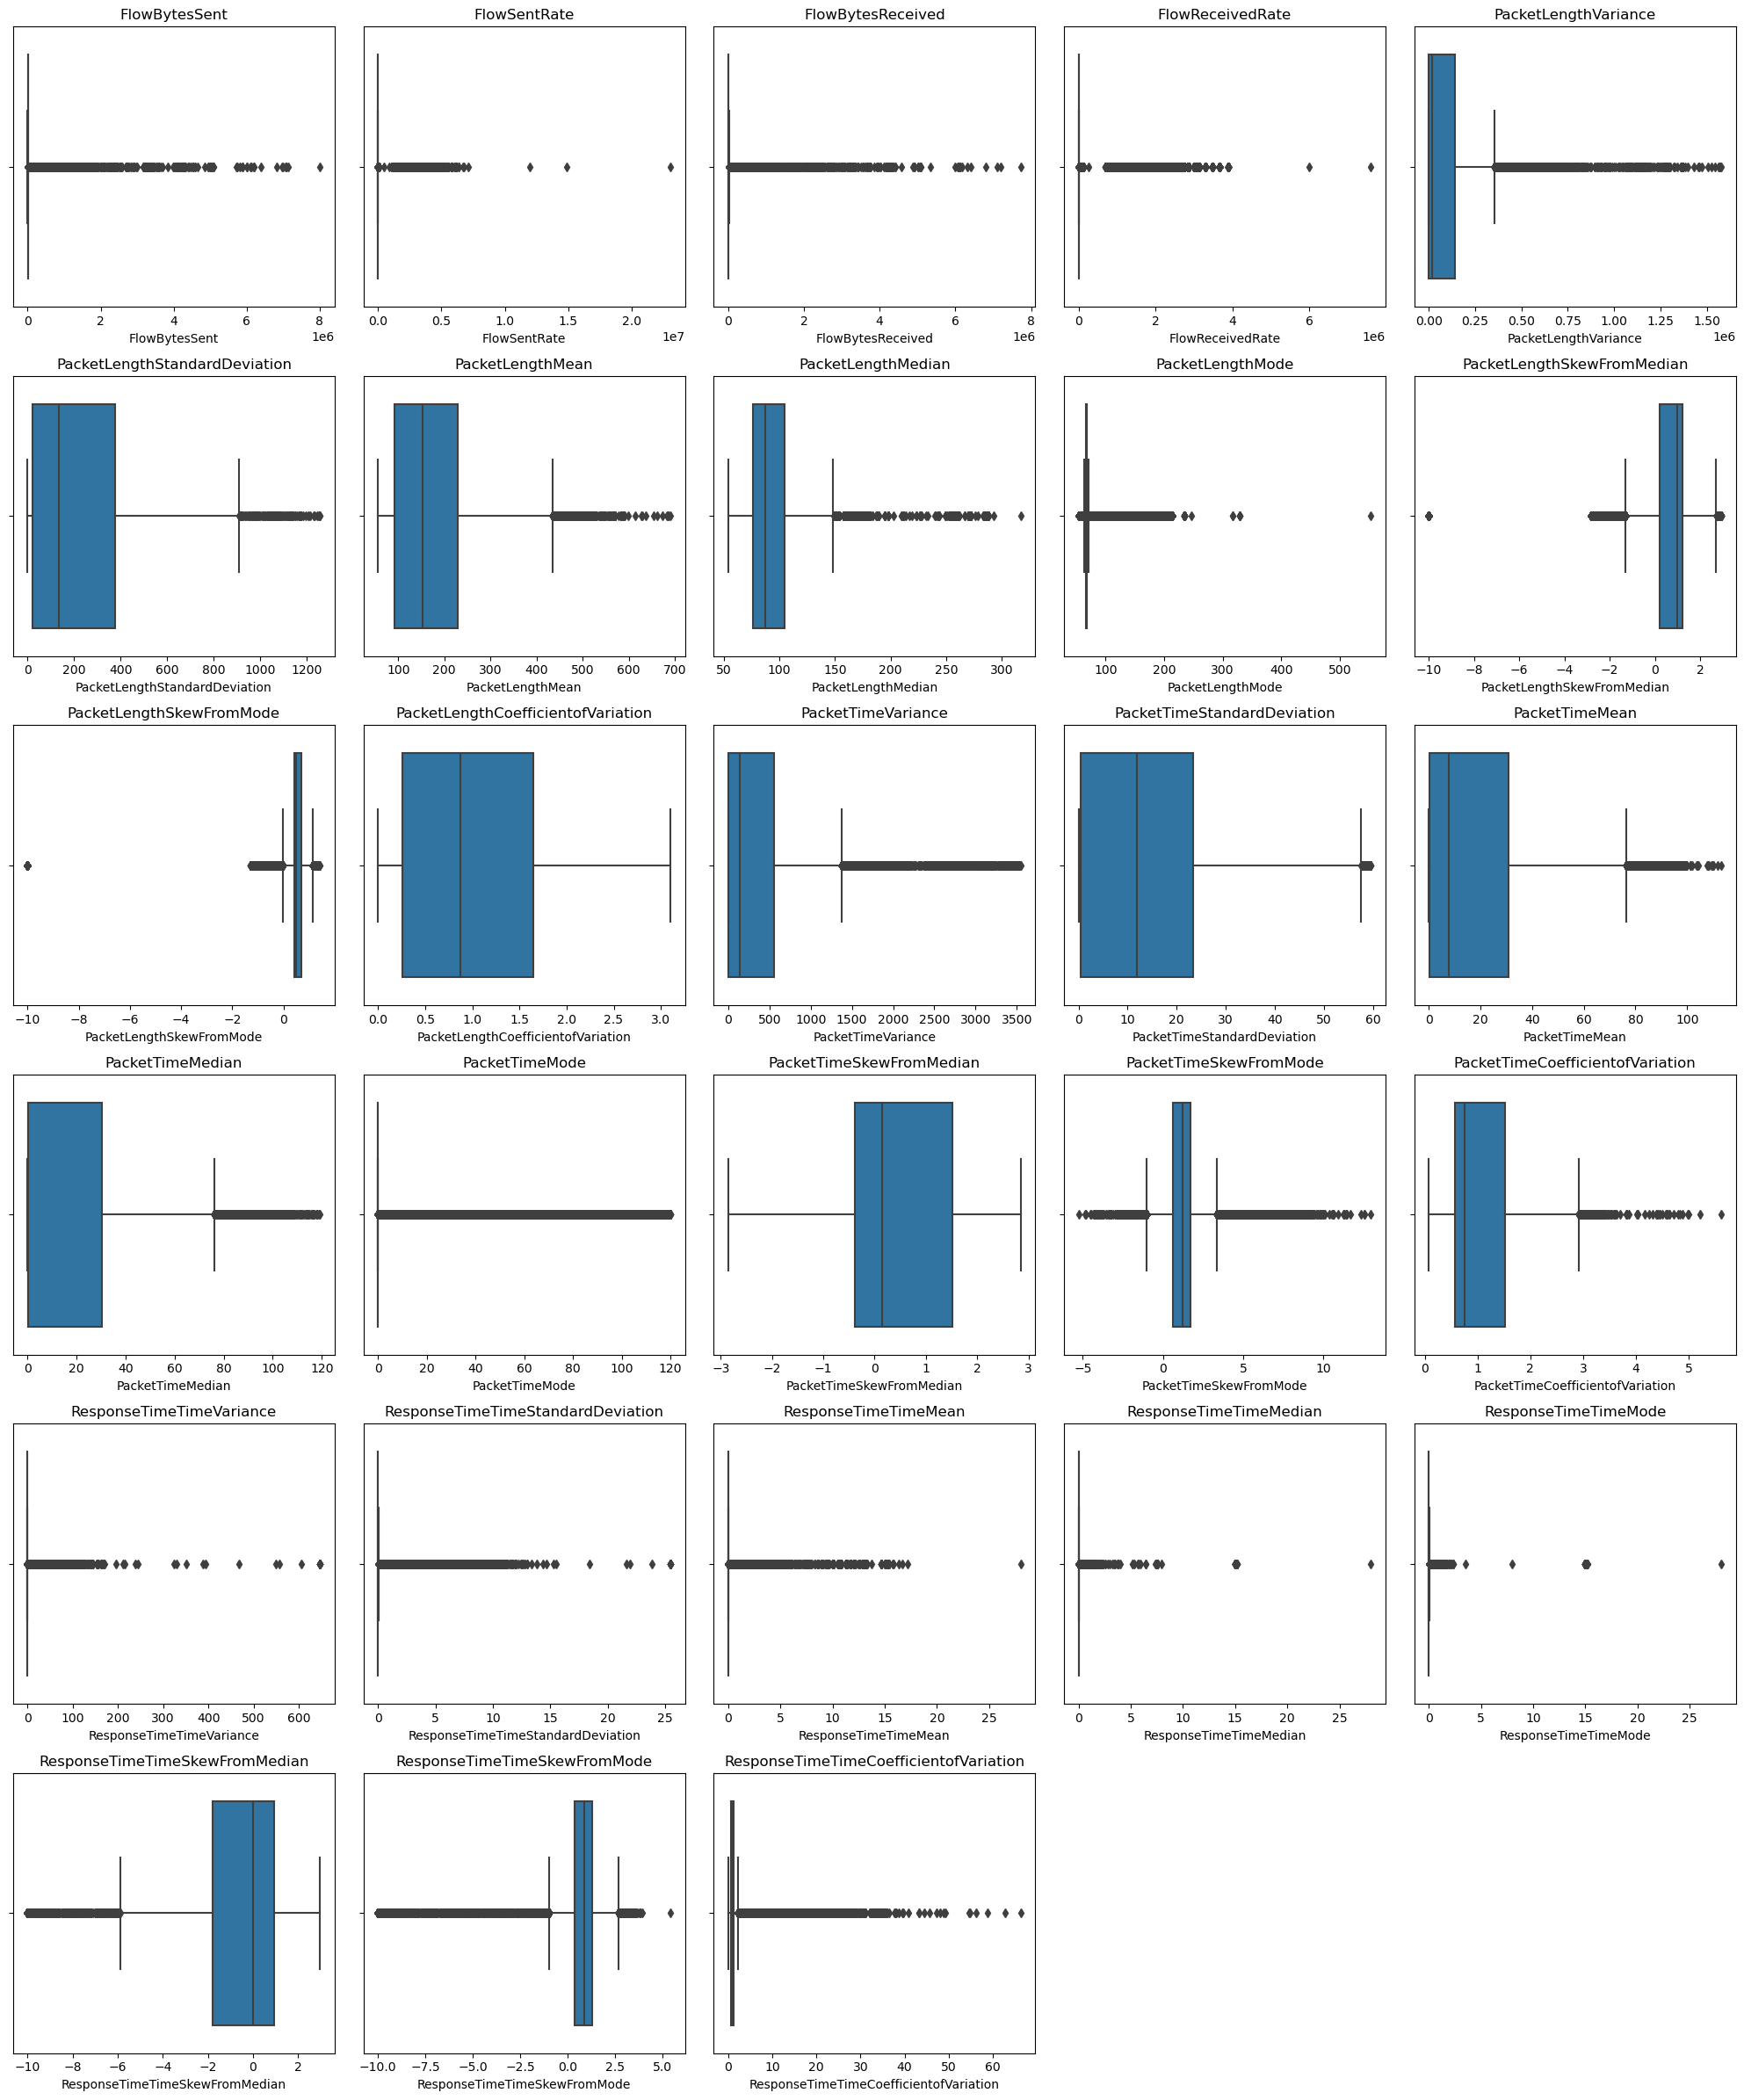

In [4]:

# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of rows and columns for the subplot grid
n = len(numeric_columns)
ncols = 5  # number of columns in the grid
nrows = n // ncols + (n % ncols > 0)  # number of rows in the grid

# Create the subplot grid
fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*4))

# Flatten the axes array and remove extra subplots
axs = axs.flatten()
for ax in axs[n:]:
    ax.remove()

# Loop through all columns in the DataFrame
for ax, column in zip(axs, numeric_columns):
    sns.boxplot(x=df[column], ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

#### Checking for missing values

We also need to check if there are any missing values in the dataset. 

We concluded that there are no missing values in the dataset.

In [7]:
# Checking if there are values missing 
df.isna().any()

FlowBytesSent                             False
FlowSentRate                              False
FlowBytesReceived                         False
FlowReceivedRate                          False
PacketLengthVariance                      False
PacketLengthStandardDeviation             False
PacketLengthMean                          False
PacketLengthMedian                        False
PacketLengthMode                          False
PacketLengthSkewFromMedian                False
PacketLengthSkewFromMode                  False
PacketLengthCoefficientofVariation        False
PacketTimeVariance                        False
PacketTimeStandardDeviation               False
PacketTimeMean                            False
PacketTimeMedian                          False
PacketTimeMode                            False
PacketTimeSkewFromMedian                  False
PacketTimeSkewFromMode                    False
PacketTimeCoefficientofVariation          False
ResponseTimeTimeVariance                

Since there were no missing values in the dataset, we decided not to filter out any registers of the dataset since that due to the nature of our problem, the values that may seem like an outlier may indicate that the network flow is malicious.

### Encoding the target variable
We need to encode the target variable **Label**, because it's of object type. The rest of the columns are already numeric, so we don't need to encode them.

In [5]:
encoder = LabelEncoder()
#Transforms the Label collumn into numeric values
df['Label'] = encoder.fit_transform(df['Label'])

df.head()

,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,353,80.890348,393,90.056393,469.209877,21.661253,82.888889,66.0,66,2.339046,...,0.534524,1.754601e-09,0.000042,0.000048,0.000019,0.000017,2.028699,0.737490,0.869641,0
1,1807,53.056709,4828,141.758602,145520.370987,381.471324,228.793103,76.0,68,1.201609,...,1.591559,5.348911e-05,0.007314,0.011523,0.015273,0.000016,-1.538407,1.573304,0.634722,1
2,15000,479.536009,27719,886.150575,25949.480963,161.088426,135.186709,87.0,87,0.897396,...,0.670950,3.356292e-01,0.579335,0.139518,0.001976,0.000003,0.712241,0.240819,4.152404,1
3,1755,58.193065,4617,153.125406,154088.445853,392.541007,245.112953,75.5,54,1.296268,...,2.029971,1.245935e+02,11.162146,5.011613,0.015778,0.012884,1.342708,0.447829,2.227258,0
4,618,3.491495,315,1.779646,319.410000,17.872045,93.300000,105.0,105,-1.963961,...,0.816362,2.975575e-09,0.000054,0.015507,0.015471,0.015466,1.986391,0.751146,0.003502,0


Now the Label values will be : 
Benign = 0 , Malicious = 1 

### Correlation between attributes


We analised the correlation of the attributes in the dataset to see if there are any attributes that are highly correlated with each other in order to reduce the number of attributes.


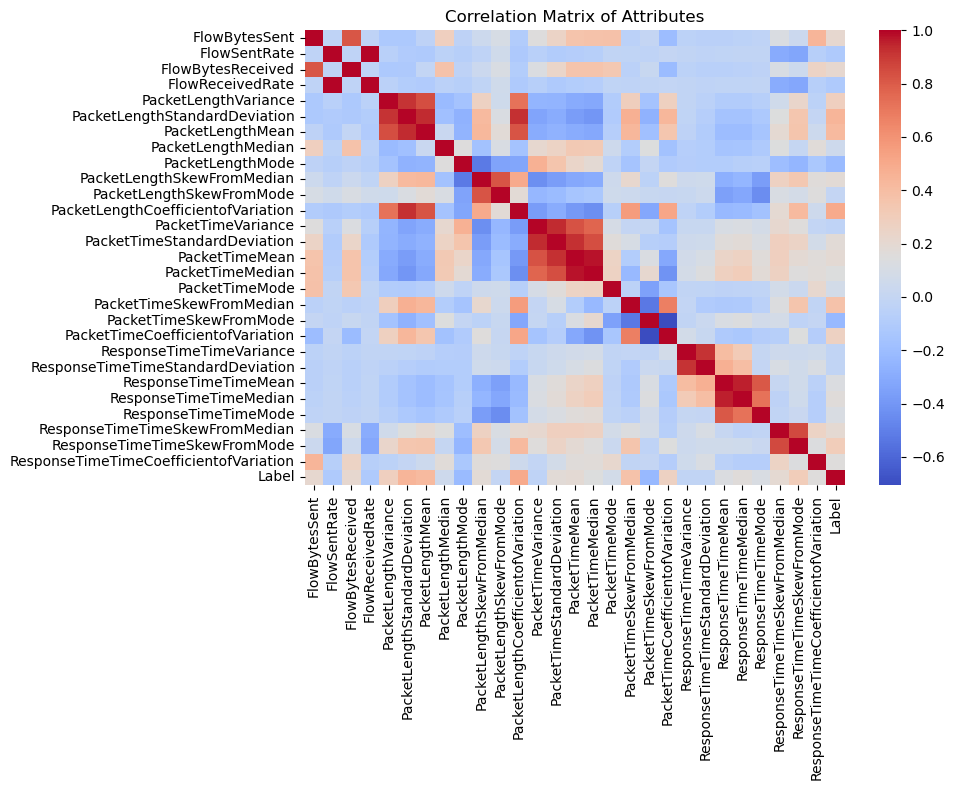

In [6]:
corr = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix of Attributes')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Rotate y-axis labels for better readability
plt.tight_layout()
plt.show()

In [7]:
# Filter the correlation matrix to include only strong correlations (absolute value greater than a threshold)
threshold = 0.92

strong_correlations = corr[(corr.abs() > threshold) & (corr < 1)]

# Iterate through the correlation matrix and print the strongly correlated attribute pairs along with their correlation coefficients
print("Strongly correlated attribute pairs:\n")
for col in strong_correlations.columns:
    correlated_attrs = strong_correlations.index[strong_correlations[col].notnull()]
    for attr in correlated_attrs:
        if attr != col:  # Exclude self-correlations
            correlation = strong_correlations.loc[attr, col]
            print(f"{attr} - {col}: {correlation:.2f}")


Strongly correlated attribute pairs:

FlowReceivedRate - FlowSentRate: 0.99
FlowSentRate - FlowReceivedRate: 0.99
PacketLengthMean - PacketLengthStandardDeviation: 0.94
PacketLengthCoefficientofVariation - PacketLengthStandardDeviation: 0.92
PacketLengthStandardDeviation - PacketLengthMean: 0.94
PacketLengthStandardDeviation - PacketLengthCoefficientofVariation: 0.92
PacketTimeStandardDeviation - PacketTimeVariance: 0.93
PacketTimeVariance - PacketTimeStandardDeviation: 0.93
PacketTimeMean - PacketTimeStandardDeviation: 0.92
PacketTimeStandardDeviation - PacketTimeMean: 0.92
PacketTimeMedian - PacketTimeMean: 0.98
PacketTimeMean - PacketTimeMedian: 0.98
ResponseTimeTimeMedian - ResponseTimeTimeMean: 0.96
ResponseTimeTimeMean - ResponseTimeTimeMedian: 0.96


From this set of correlated attributes, we decided to aggregate them into groups:

In [8]:
df['Combined_FlowRate'] = (df['FlowReceivedRate'] + df['FlowSentRate']) / 2

df['PacketLengthVariability'] = df['PacketLengthStandardDeviation'] / df['PacketLengthMean']

df['PacketTimeVariability'] = df['PacketTimeStandardDeviation'] / df['PacketTimeMean']

df['PacketTimeSkewFromMedian'] = df['PacketTimeMedian'] - df['PacketTimeMean']

df['ResponseTimeCharacteristics'] = df['ResponseTimeTimeMedian'] - df['ResponseTimeTimeMean']


drop_columns = ['FlowReceivedRate', 'FlowSentRate', 'PacketLengthStandardDeviation', 'PacketLengthMean', 'PacketTimeStandardDeviation', 'PacketTimeMean', 'PacketTimeMedian', 'ResponseTimeTimeMedian', 'ResponseTimeTimeMean']

df.drop(columns=drop_columns, inplace=True)


### Correlation between the attributes and the target variable

We also analised the correlation between the attributes and the target variable to see which attributes are more relevant to the target variable.


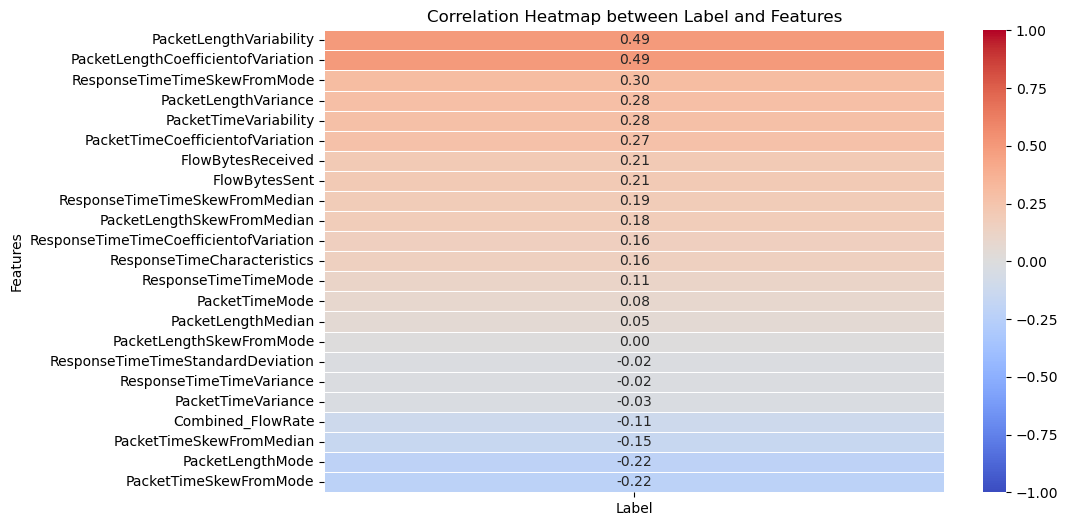

In [9]:
corr = df.corr()    
# Extract correlation between the target variable and other features
label_correlation = corr['Label'].drop('Label')

# Filter out correlation values for only the features
label_feature_correlation = corr.loc['Label', :].drop('Label')

# Sort the correlations in descending order
label_feature_correlation = label_feature_correlation.sort_values(ascending=False)

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(label_feature_correlation.to_frame(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, vmax=1, vmin=-1)
plt.title('Correlation Heatmap between Label and Features')
plt.ylabel('Features')
plt.show()

From this heatmap we can see that no attribute is strongly correlated with the Label.

## Decision Tree Implementation

Cross-validated scores: [0.99949911 0.99952916 0.9996093  0.99950912 0.99954919]
Mean cross-validated score: 0.9995391761270506
Accuracy: 0.9995491975716776


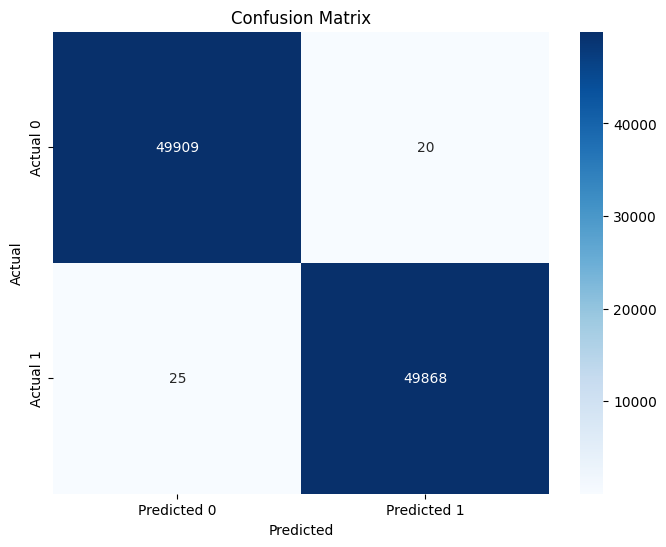

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49929
           1       1.00      1.00      1.00     49893

    accuracy                           1.00     99822
   macro avg       1.00      1.00      1.00     99822
weighted avg       1.00      1.00      1.00     99822



In [13]:
from sklearn.model_selection import cross_val_score

X = df.drop(columns=['Label']) 
y = df['Label'] 

# Perform 5-fold cross validation
model = DecisionTreeClassifier()
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validated scores:", scores)
print("Mean cross-validated score:", scores.mean())

# Continue with the train-test split and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

## SVM Models and Comparisons


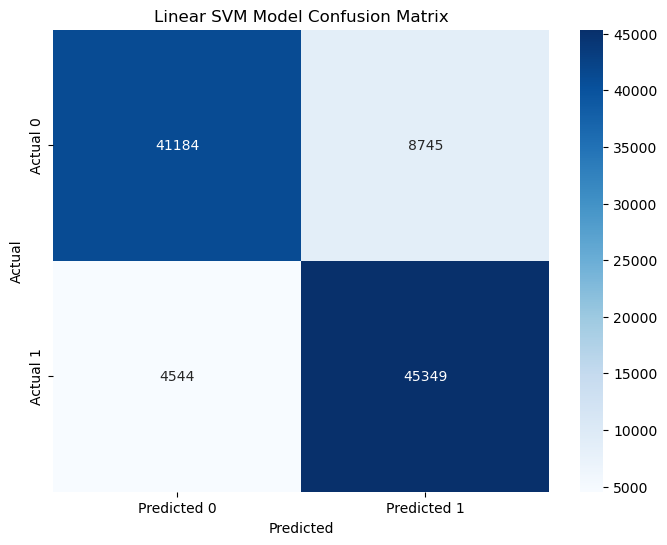

Linear SVM Model:
Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86     49929
           1       0.84      0.91      0.87     49893

    accuracy                           0.87     99822
   macro avg       0.87      0.87      0.87     99822
weighted avg       0.87      0.87      0.87     99822



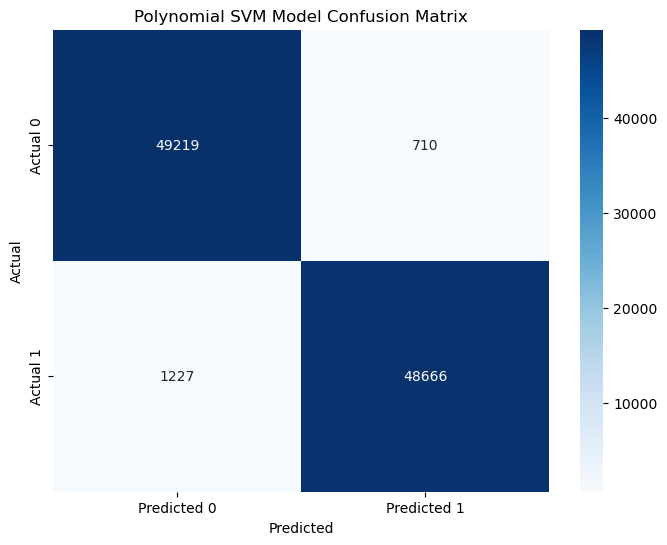

Polynomial SVM Model:
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     49929
           1       0.99      0.98      0.98     49893

    accuracy                           0.98     99822
   macro avg       0.98      0.98      0.98     99822
weighted avg       0.98      0.98      0.98     99822



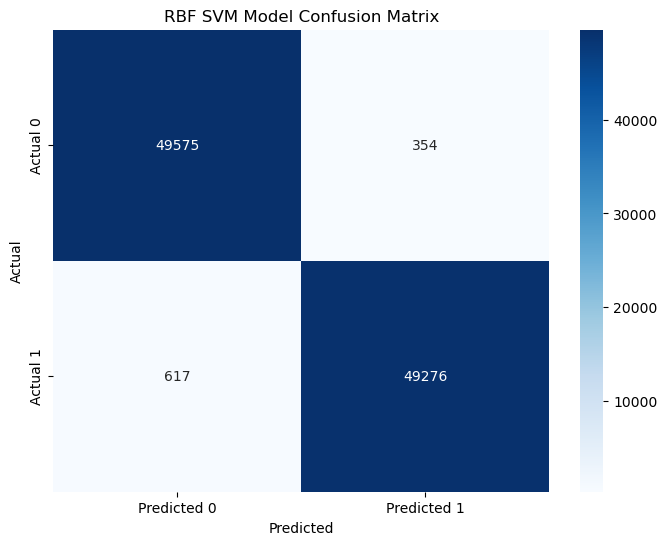

RBF SVM Model:
Accuracy: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     49929
           1       0.99      0.99      0.99     49893

    accuracy                           0.99     99822
   macro avg       0.99      0.99      0.99     99822
weighted avg       0.99      0.99      0.99     99822



In [10]:
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC

# Split the data into features and target
X = df.drop(columns=['Label'])
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the table features to the same range 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to evaluate the model
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    # Plot confusion matrix with seaborn heatmap
    plt.figure(figsize=(8, 6))
    cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
    plt.title(f'{model_name} Model Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Print accuracy and classification report
    print(f'{model_name} Model:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

# Linear SVM
linear_svc = SVC(kernel='linear', random_state=42)
linear_svc.fit(X_train, y_train)
evaluate_model(linear_svc, X_test, y_test, 'Linear SVM')

# Polynomial SVM
poly_svc = SVC(kernel='poly', degree=3, random_state=42)
poly_svc.fit(X_train, y_train)
evaluate_model(poly_svc, X_test, y_test, 'Polynomial SVM')

# RBF SVM
rbf_svc = SVC(kernel='rbf', random_state=42)
rbf_svc.fit(X_train, y_train)
evaluate_model(rbf_svc, X_test, y_test, 'RBF SVM')



As we can see with the 3 SVM, the linear SVM achieved an accuracy of 0.87, indicating that a simple linear decision boundary can somewhat effectively separate the classes but struggles with more complex patterns, the polynomial SVM, with an accuracy of 0.98, demonstrates a substantial improvement, capturing non-linear relationships better due to its polynomial transformation, the RBF SVM outperforms both with an accuracy of 0.99, showcasing its superior ability to model intricate, non-linear relationships in the data.

# Neural Networks

In [this article](https://www.mdpi.com/2073-431X/12/3/47), we found an image with the proposed method, that suggested using 30% of the size dataset as test data and the rest to the training set.

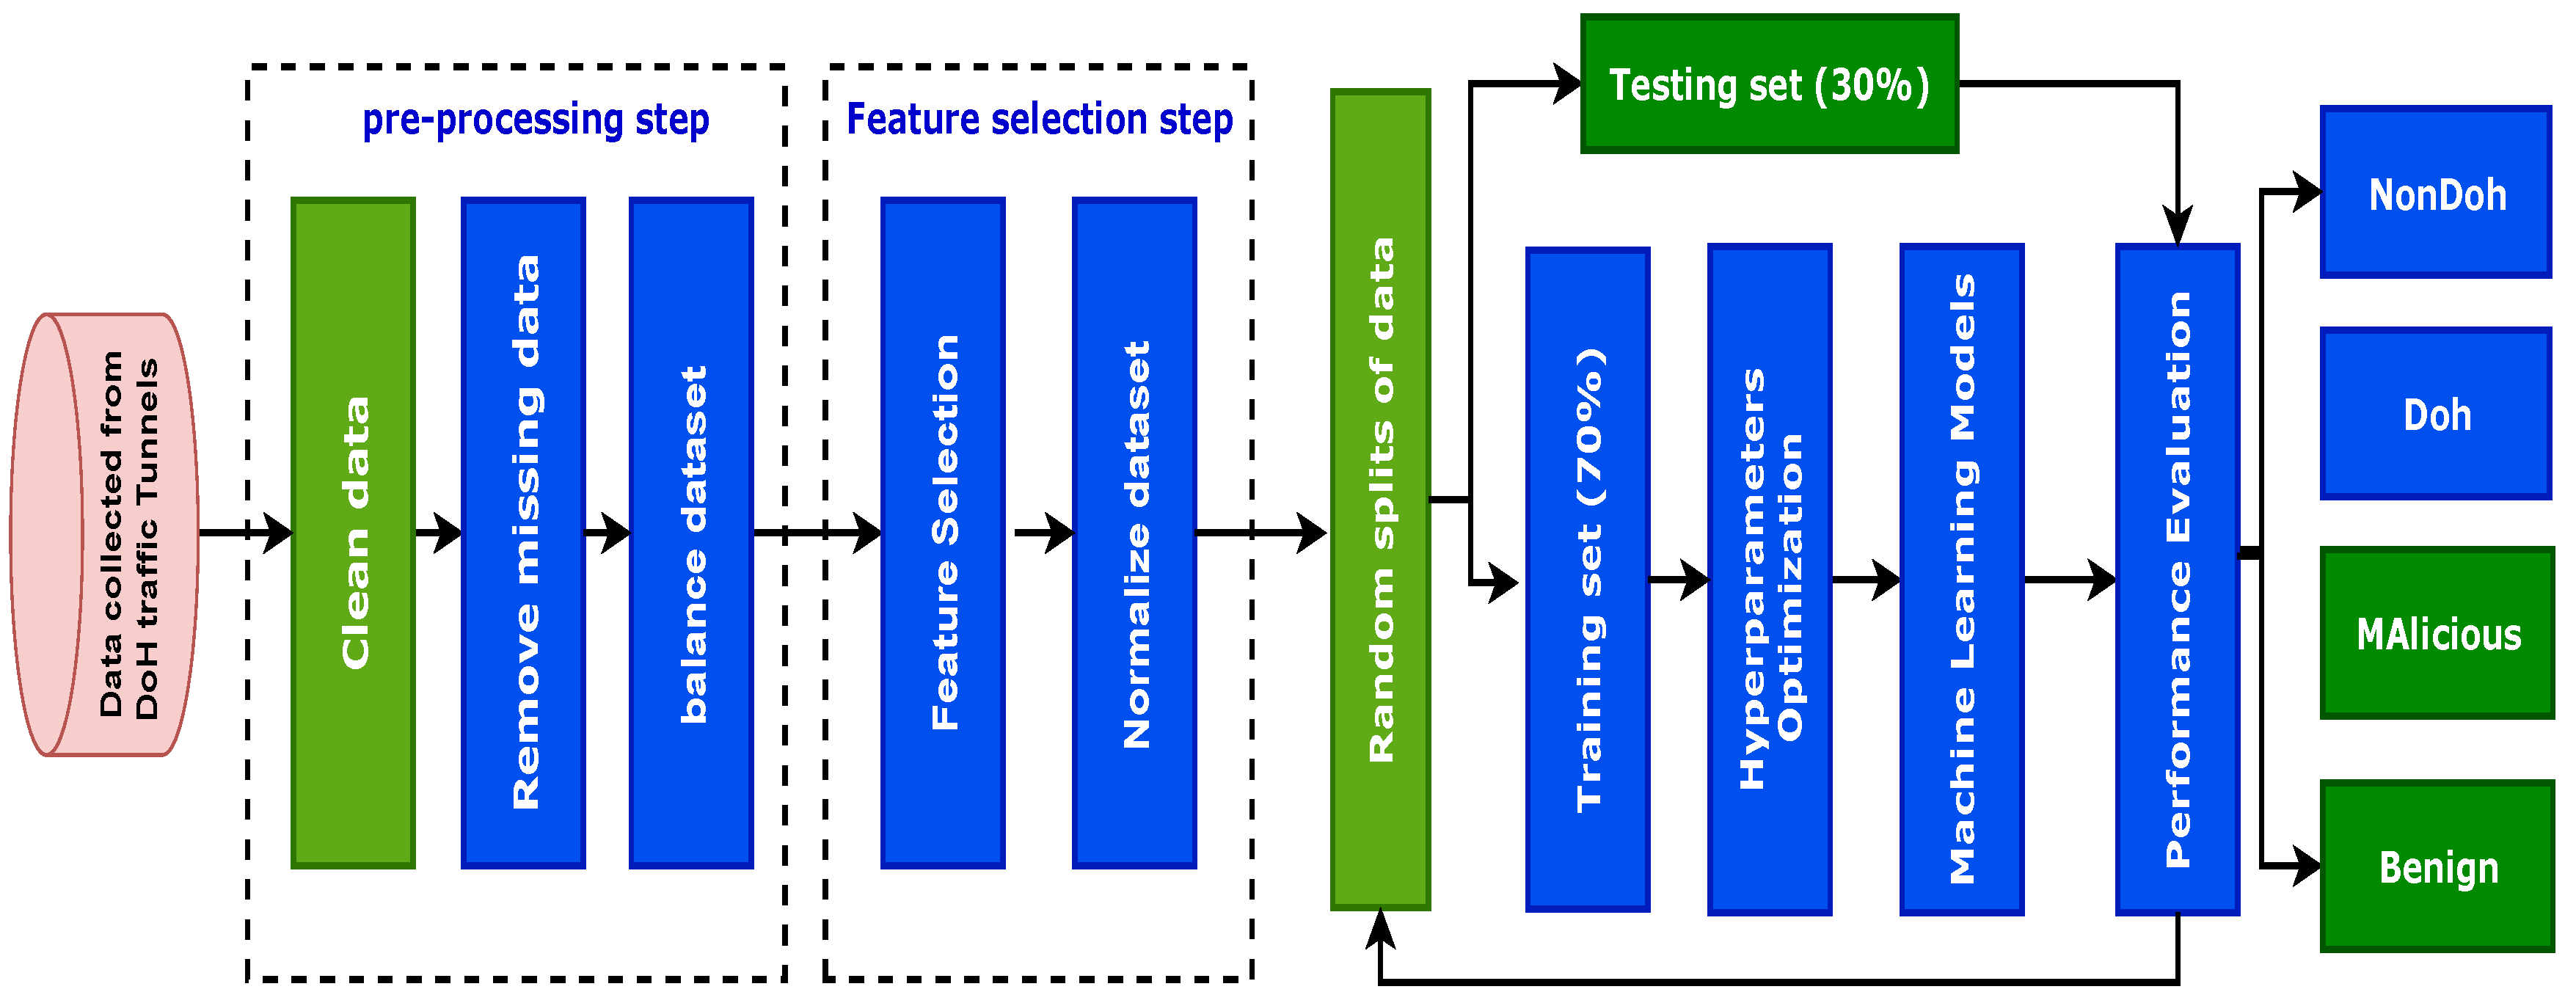

We are implementing the neural networks algorithm with three hidden layers with 10 neurons each and the maximum numbers of iterations set is 1000.

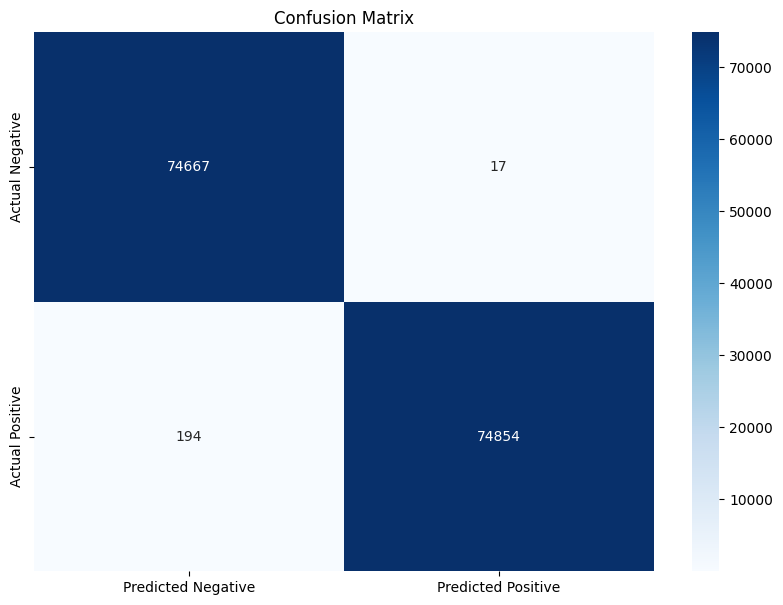


Classification Report:

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     74684
   Malicious       1.00      1.00      1.00     75048

    accuracy                           1.00    149732
   macro avg       1.00      1.00      1.00    149732
weighted avg       1.00      1.00      1.00    149732

Cross-validation scores:  [0.90454008 0.92990453 0.93420222 0.8395528  0.96380521]
Average cross-validation score:  0.9144009686537273


In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

X = df.drop('Label', axis=1)
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features to have mean=0 and variance=1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Multi-Layer Perceptron Classifier
model = MLPClassifier(hidden_layer_sizes=(25, 18, 11), max_iter=1000)
# Train the model
model.fit(X_train, y_train)
# Make predictions
predictions = model.predict(X_test)



cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


print("\nClassification Report:\n")
print(classification_report(y_test, predictions))


# Perform 5-fold cross validation
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores: ", scores)
print("Average cross-validation score: ", scores.mean())

Now, implementing the same algorithm but now with four hidden layers with different neurons and the maximum numbers of iterations set is 1000.

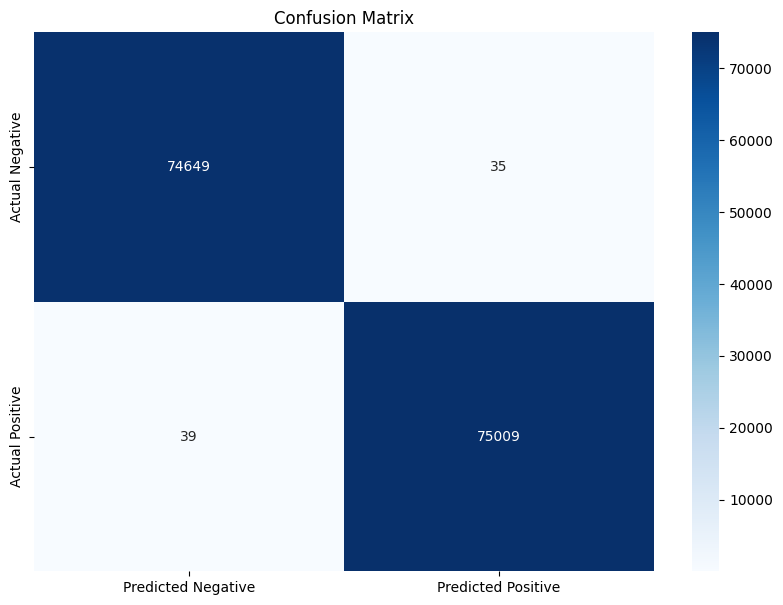


Classification Report:

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     74684
   Malicious       1.00      1.00      1.00     75048

    accuracy                           1.00    149732
   macro avg       1.00      1.00      1.00    149732
weighted avg       1.00      1.00      1.00    149732

Cross-validation scores:  [0.94953016 0.96052935 0.99367868 0.95638192 0.98031476]
Average cross-validation score:  0.9680869766278365


In [5]:
X = df.drop('Label', axis=1)
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features to have mean=0 and variance=1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = MLPClassifier(hidden_layer_sizes=(30, 40, 20, 10), max_iter=1000)
model.fit(X_train, y_train)
predictions = model.predict(X_test)



cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


print("\nClassification Report:\n")
print(classification_report(y_test, predictions))


# Perform 5-fold cross validation
scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores: ", scores)
print("Average cross-validation score: ", scores.mean())

Observing the confusion matrices and the analysed metrics of the two implementations, we observe a decrease in false negatives and a slight increse on cross-validation scores on the second implementation.

# K-Nearest Neighbor

Implementing the K-Nearest Neighbor algorithm, we assigned our k number of neighbors as 3.
This means that the algorithm will pick the majority result between the 3 picked neighbors.

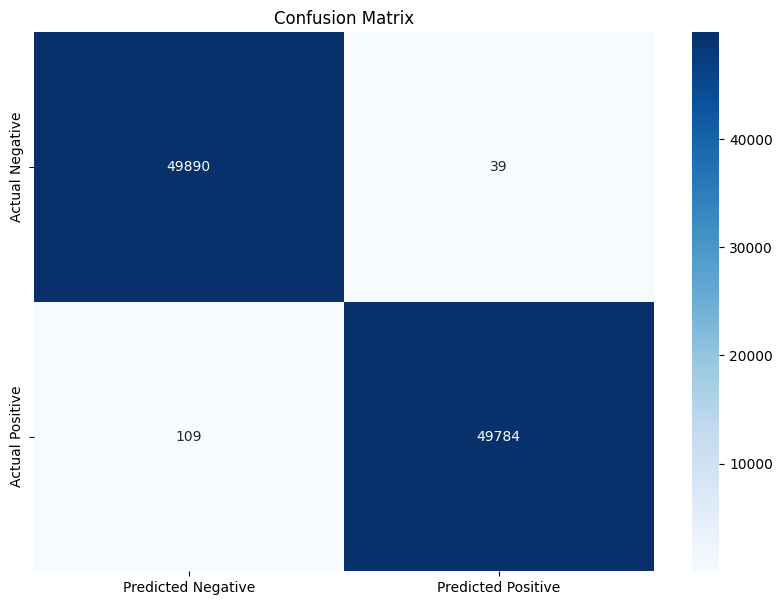


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     49929
           1       1.00      1.00      1.00     49893

    accuracy                           1.00     99822
   macro avg       1.00      1.00      1.00     99822
weighted avg       1.00      1.00      1.00     99822

Cross-validation scores:  [0.99486085 0.99472055 0.99449014 0.99487082 0.99482073]
Average cross-validation score:  0.994752617463555


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop('Label', axis=1)
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features to have mean=0 and variance=1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Initialize the KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
predictions = model.predict(X_test)


cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


print("\nClassification Report:\n")
print(classification_report(y_test, predictions))


scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores: ", scores)
print("Average cross-validation score: ", scores.mean())

Now, implementing the same algorithm but now with number of neighbors set to 7.

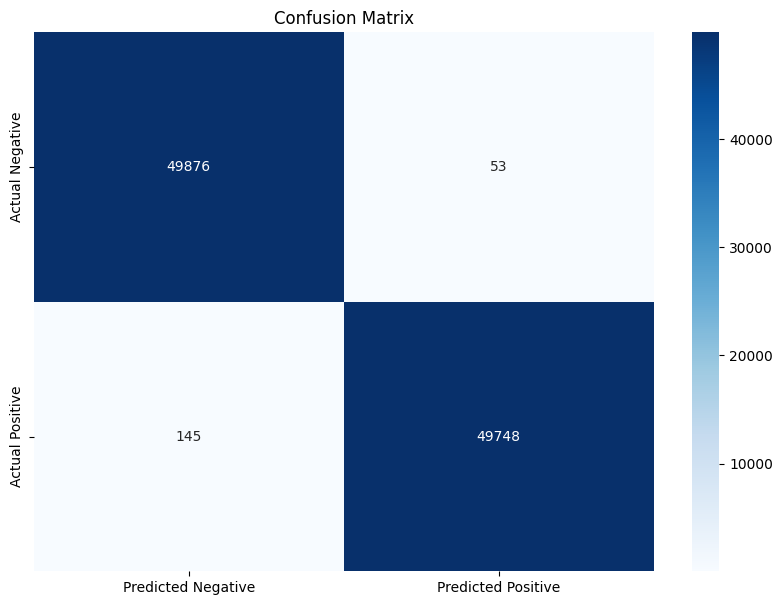


Classification Report:

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     49929
   Malicious       1.00      1.00      1.00     49893

    accuracy                           1.00     99822
   macro avg       1.00      1.00      1.00     99822
weighted avg       1.00      1.00      1.00     99822

Cross-validation scores:  [0.99354852 0.99324791 0.99289729 0.99360856 0.99324791]
Average cross-validation score:  0.9933100378707559


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop('Label', axis=1)
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features to have mean=0 and variance=1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Initialize the KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)
predictions = model.predict(X_test)


cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])
plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


print("\nClassification Report:\n")
print(classification_report(y_test, predictions))


scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores: ", scores)
print("Average cross-validation score: ", scores.mean())

Observing the confusion matrices and the analysed metrics of the two implementations, we can conclude that setting a larger number of neighbors to pick from, doesn't mean the algorithm is going to have better results.